In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bucket import create_bucket_synopsis
from lloyd import lloyd_with_weights, lloyd
from util import normalise

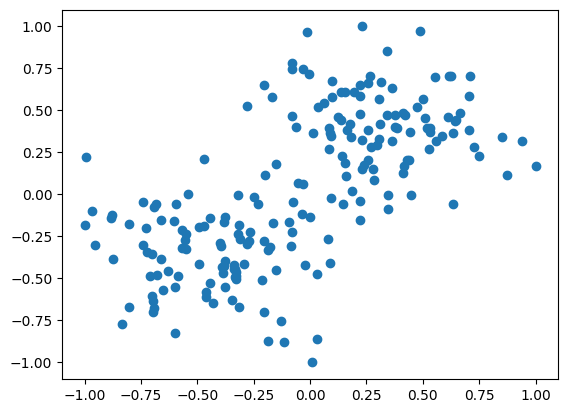

In [2]:
data1 = np.random.multivariate_normal(mean=[1,1], cov=[[1,0],[0,1]], size=100)
df1 = pd.DataFrame(data1)
data2 = np.random.multivariate_normal(mean=[4,4], cov=[[1,0],[0,1]], size=100)
df2 = pd.DataFrame(data2)
df = normalise(pd.concat([df1, df2]))
plt.scatter(x=df[0], y=df[1])

In [3]:
weighted_points = create_bucket_synopsis(df, e=10, d=2, branching_threshold = 5, max_depth = 10, data_bound=1)

Leaves
[(           0         1
50  0.283165  0.087972
30  0.941272  0.316407
34  0.410094  0.125405
35  0.851693  0.342901
43  0.725972  0.280186
51  0.747363  0.227193
64  0.439742  0.207861
77  0.527772  0.272726
79  0.429387  0.206489
95  0.415117  0.167480, np.float64(21.35964461026987)), (           0         1
0   0.622904  0.704871
3   0.413457  0.485679
7   0.709915  0.706844
12  0.473462  0.518044
18  0.141164  0.230267
20  0.499049  0.570340
37  0.258536  0.383823
38  0.376128  0.475689
40  0.304094  0.329240
54  0.311372  0.421011
61  0.361702  0.633161
62  0.342812  0.473575
70  0.422711  0.471234
80  0.387185  0.398542
82  0.229245  0.321692
83  0.155178  0.186241
87  0.552301  0.700653
88  0.376158  0.399508
94  0.615414  0.704360
98  0.268941  0.281802
99  0.297914  0.296523, np.float64(39.34100316705306)), (           0         1
4   0.646265  0.443215
6   0.665649  0.487299
21  0.255623  0.203617
23  0.443987  0.373378
25  0.530338  0.398621
36  0.520181  0.398076
39 

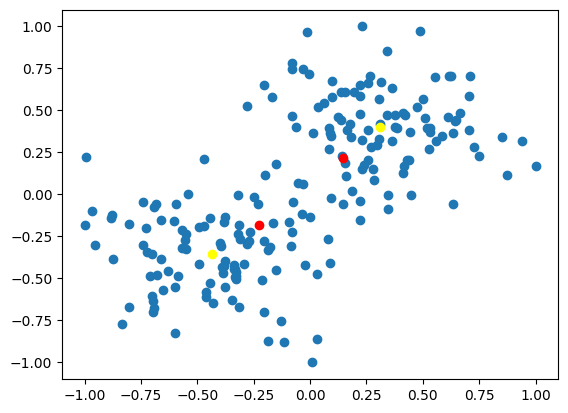

In [5]:
centers = pd.DataFrame(lloyd_with_weights(k=2, X=weighted_points.iloc[:, :2], weights=weighted_points[2], n_iter=10))
real_centers = pd.DataFrame(lloyd(k=2, X=df, n_iter=10))
plt.scatter(x=df[0], y=df[1])
plt.scatter(x=centers[0], y=centers[1], color="red")
plt.scatter(x=real_centers[0], y=real_centers[1], color="yellow")

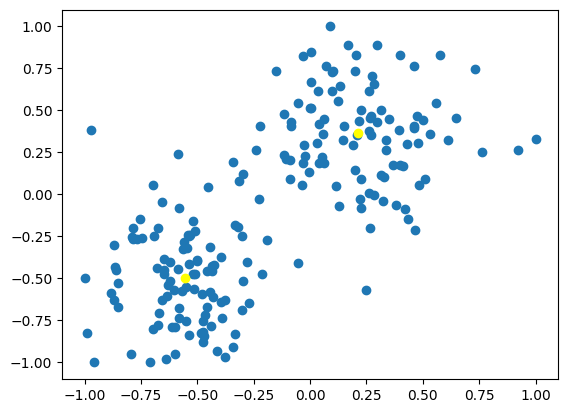

In [16]:
real_centers = pd.DataFrame(lloyd(k=2, X=df, n_iter=10))
plt.scatter(x=df[0], y=df[1])
plt.scatter(x=real_centers[0], y=real_centers[1], color="yellow")

### How to choose branching_threshold and max_depth? 

- max_depth would be proportional to the log of the branching threshold

- guess would be it depends on the data: can we do some experiments?

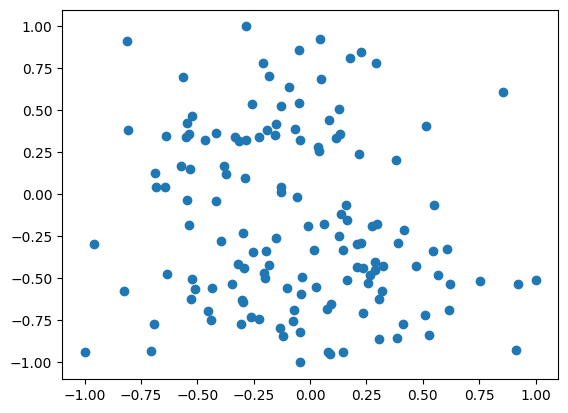

In [17]:
# make data with a few more clusters

X = normalise(pd.DataFrame(
    np.concat([
    np.random.multivariate_normal(mean=[1,1], cov=[[1,0],[0,1]], size=50),
    np.random.multivariate_normal(mean=[2,2], cov=[[1,0],[0,1]], size=10),
    np.random.multivariate_normal(mean=[2,0], cov=[[1,0],[0,1]], size=30),
    np.random.multivariate_normal(mean=[1,4], cov=[[1,0],[0,1]], size=50)
    ]
)))

plt.scatter(x=X[0], y=X[1])

In [47]:
def bucket_then_centers(X, e, d, bt, md, db, k):
    weighted_X = create_bucket_synopsis(X, e, d, bt, md, db)
    print(weighted_X)
    return pd.DataFrame(lloyd_with_weights(k=k, X=weighted_X.iloc[:, :2], weights=weighted_X[2], n_iter=10))

Leaves
[(            0         1
0   -0.634036 -0.472540
1   -0.433069 -0.556631
4    0.075117 -0.683241
5   -0.206454 -0.464444
6   -0.705526 -0.929092
9   -0.152802 -0.256210
12   0.016408 -0.329272
14   0.025870 -0.553643
15  -1.000000 -0.936160
17  -0.101049 -0.554483
18  -0.253725 -0.339781
20  -0.958739 -0.291884
21  -0.299067 -0.230262
22  -0.418925 -0.036427
23  -0.320417 -0.412562
24  -0.526618 -0.624097
27  -0.035931 -0.488732
32  -0.044408 -0.816238
33  -0.525784 -0.502736
34  -0.509739 -0.562612
35  -0.547967 -0.033182
36   0.091409 -0.654129
37  -0.293625 -0.437357
38  -0.347320 -0.529993
39  -0.691495 -0.770836
42  -0.825204 -0.574472
43  -0.296535 -0.641704
44  -0.200627 -0.496176
45  -0.536914 -0.179895
48  -0.302238 -0.626825
49  -0.070297 -0.688204
51  -0.180196 -0.419054
54  -0.055875 -0.016963
60  -0.196318 -0.338325
64  -0.134776 -0.792957
66  -0.439867 -0.749341
68  -0.305771 -0.771306
69   0.086958 -0.951191
70   0.078667 -0.936138
72  -0.045702 -1.000000
74  -0.

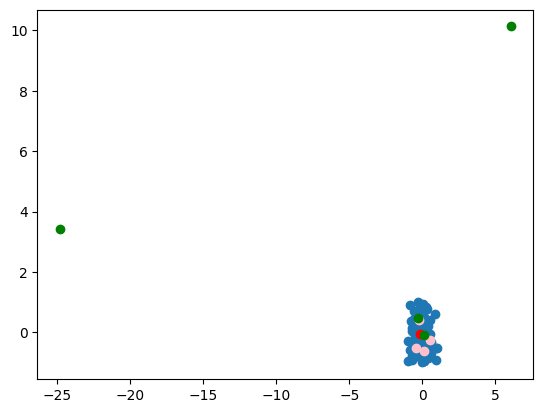

In [31]:
real_center = pd.DataFrame(lloyd(4, X, 10))
c1 = bucket_then_centers(X, 1, 2, 8, 3, 1)
c2 = bucket_then_centers(X, 1, 2, 3, 8, 1)

plt.scatter(x=X[0], y=X[1])
plt.scatter(x=real_center[0], y=real_center[1], color="pink")
plt.scatter(x=c1[0], y=c1[1], color = "red")
plt.scatter(x=c2[0], y=c2[1], color = "green")

Leaves
[(            0         1
247  0.603314  0.138480
295  0.551769  0.143001
307  0.574657  0.045231
318  0.681917  0.151944
339  0.673329  0.189354
354  0.250223 -0.006661
356  0.337914  0.000394
575  0.577353  0.027528, np.float64(1.8330259275661263)), (            0         1
15  -0.089759 -0.459719
31  -0.375917 -0.563351
34  -0.248244 -0.403891
35  -0.144428 -0.378913
41  -0.393570 -0.643249
48  -0.076934 -0.222764
49  -0.270320 -0.426768
58  -0.265310 -0.424764
60  -0.076523 -0.376055
74  -0.538307 -0.837008
87  -0.331006 -0.607414
99  -0.377487 -0.559899
101 -0.126929 -0.395346
104 -0.209477 -0.793166
108 -0.314723 -0.653019
110 -0.088551 -0.506699
145 -0.075311 -0.493554
158 -0.246104 -0.413329
160 -0.274829 -0.613562
162 -0.162755 -0.351629
170 -0.102142 -0.405802
173 -0.323022 -0.720436
178 -0.162365 -0.338649
179 -0.107514 -0.529873
181 -0.183643 -0.311962
182 -0.156875 -0.925404
186 -0.213913 -0.358223
192 -0.235339 -0.447846
195 -0.218385 -0.665263
196 -0.217606 -0.496

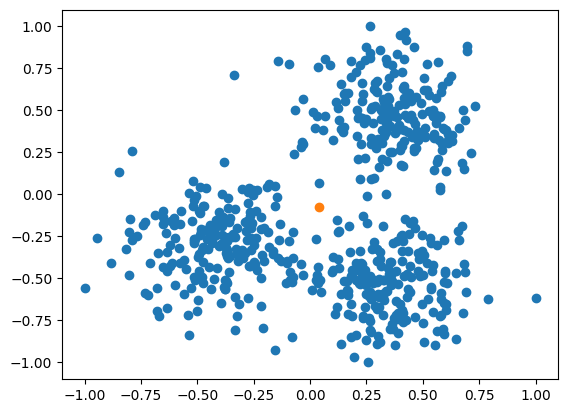

In [51]:
data = normalise(pd.DataFrame(np.concat(
    [np.random.multivariate_normal(mean=[1,1], cov=[[1,0],[0,1]], size=200),
    np.random.multivariate_normal(mean=[5,5], cov=[[1,0],[0,1]], size=200),
    np.random.multivariate_normal(mean=[5,0], cov=[[1,0],[0,1]], size=200)]
)))

plt.scatter(x=data[0], y=data[1])
c = bucket_then_centers(data, 1, 2, 2, 10, 1, 3)
print(c)
plt.scatter(x=c[0], y=c[1])